# sklearn.ensemble.RandomForestRegressor
- A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [1]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from yellowbrick.model_selection import ValidationCurve
from sklearn.compose import TransformedTargetRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib5 = Data.columns[30]
col = Data.columns
cv = KFold(n_splits=10)

In [3]:
X = Data[features]
y = Data[Rib5]

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import PowerTransformer
# power = PowerTransformer(method='yeo-johnson', standardize=True)
power = PowerTransformer(method='box-cox', standardize=True)

# scaler = MaxAbsScaler()
# scaler = StandardScaler()
# scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = QuantileTransformer()
# scaler = MinMaxScaler()
# scaler = Normalizer(norm = 'l2')
# transformer = FunctionTransformer(np.log2, validate = True)

# r = Data['rib1'].values
# ax=r.reshape(-1, 1)
# yu = scaler.fit_transform(ax)
# yu = power.fit_transform(ax)
# yu= (Data[Rib1])**(1/3)
yu = np.log(Data[Rib1])
# yu = transformer.transform(ax)
df=pd.DataFrame(yu)
df.skew()
yu.skew()

0.8629802964724013

# Validation curves

In [5]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# n_estimators
- int, default=100
- The number of trees in the forest.

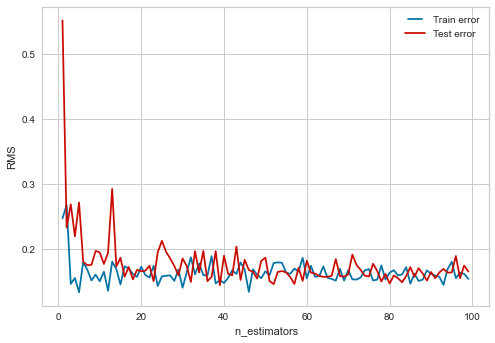

In [6]:
learning_rates = np.arange(1, 100, 1)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(n_estimators=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' n_estimators')
plt.show()

# Max_depth
- int, default=None
- The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

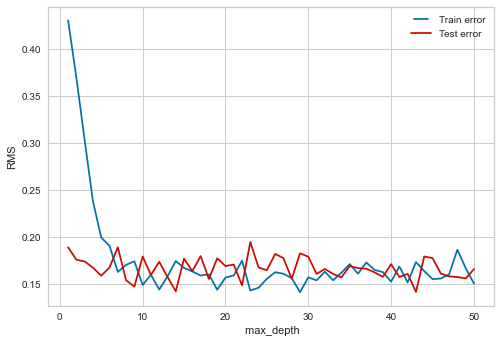

In [8]:
learning_rates = np.linspace(1, 50, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(max_depth=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' max_depth')
plt.show()

## min_sample_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)# min_samples_split
- int or float, default=2
- The minimum number of samples required to split an internal node:
- If int, then consider min_samples_split as the minimum number.
- If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

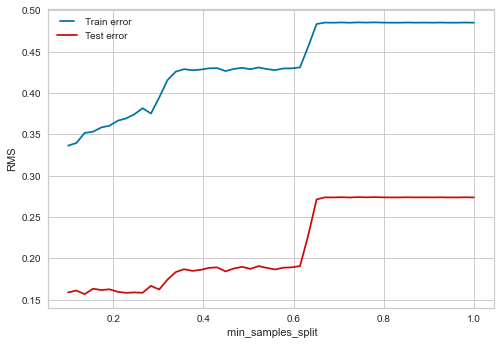

In [10]:
learning_rates = np.linspace(0.1, 1, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_split=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' min_samples_split')
plt.show()

# min_samples_leaf
- int or float, default=1
- The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.
- If int, then consider min_samples_leaf as the minimum number.
- If float, then min_samples_leaf is a fraction and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

In [11]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

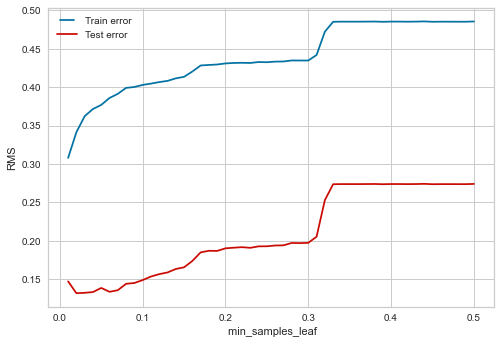

In [12]:
learning_rates = np.linspace(0.01, 0.5, 50, endpoint=True)
train_results = []
test_results = []
for eta in learning_rates:
    model = RandomForestRegressor(min_samples_leaf=eta)
    wrapped_model = TransformedTargetRegressor(regressor=model,func=np.log,inverse_func=np.exp)
    mod=wrapped_model.fit(x_train, y_train)
    train_pred = mod.predict(x_train)
    train_pred=train_pred.reshape(-1, 1)
    ax=mean_squared_error(y_train, train_pred,squared=False)
    train_results.append(ax)
    y_pred = mod.predict(x_test)
    ax=mean_squared_error(y_test, y_pred,squared=False)
    test_results.append(ax)
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(learning_rates, train_results, 'b', label="Train error")
line2, = plt.plot(learning_rates, test_results, 'r', label="Test error")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('RMS')
plt.xlabel(' min_samples_leaf')
plt.show()

---
---

# Random Hyperparameter Grid

In [13]:
X=Data[features]
y=Data[Rib5]

In [40]:
# Rib5:

n_estimators = [5,10,15,18,20,25,28,30,32,35,36,38,40]
max_features = ['auto','sqrt']
max_depth = [5,10,12,15,18,20,22,25,26,28,30,35,40,45]
min_samples_split = [0.01,0.02,0.03,0.04,0.05,0.055,0.06,0.065,0.07,0.075,0.08,0.09,0.1]
min_samples_leaf = [0.01,0.02,0.025,0.03,0.035,0.04,0.045,0.05,0.055,0.06,0.1,0.2,0.3,0.4,0.5]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [41]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
y_t=np.log(y)
rf = RandomForestRegressor()
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 10, verbose=2, random_state=12, n_jobs = -1)
# Fit the random search model
rf_random.fit(X,y_t)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 327 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done 570 tasks      | elapsed:   32.3s
[Parallel(n_jobs=-1)]: Done 960 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 1580 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:  1.9min remaining:    0.7s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.9min finished


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['mse', 'mae'],
                                        'max_depth': [5, 10, 12, 15, 18, 20, 22,
                                                      25, 26, 28, 30, 35, 40,
                                                      45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [0.01, 0.02, 0.025,
                                                             0.03, 0.035, 0.04,
                                                             0.045, 0.05, 0.055,
                                                             0.06, 0.1, 0.2,
                                                             0.3, 0.4, 0.5],
                                        'min_samples_split': [0.01, 0.02,

In [42]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=12, min_samples_leaf=0.025,
                      min_samples_split=0.05, n_estimators=36, warm_start=True)

In [43]:
rf_random.best_params_

{'warm_start': True,
 'oob_score': False,
 'n_estimators': 36,
 'min_samples_split': 0.05,
 'min_samples_leaf': 0.025,
 'max_features': 'auto',
 'max_depth': 12,
 'criterion': 'mse',
 'bootstrap': True}

In [44]:
#Rib5
X=Data[features]
y=Data[Rib5]
mode=RandomForestRegressor(max_depth=12, min_samples_leaf=0.025, min_samples_split=0.05,
                      n_estimators=36, oob_score=False,warm_start=True,max_features='auto',criterion='mse',bootstrap=True)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

In [45]:
cv = KFold(n_splits=10, random_state=1)

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [46]:
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=12)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')


<Figure size 576x396 with 0 Axes>

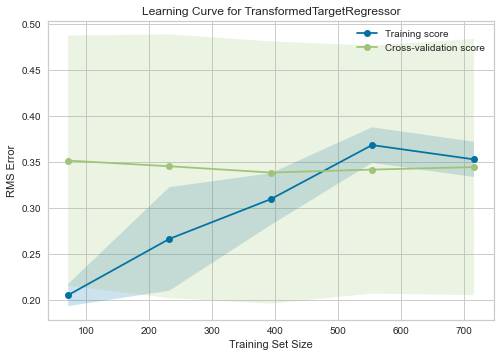

In [47]:

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

In [48]:
X = X.to_numpy()
y = y.to_numpy()

In [49]:
y_Test=y_Test.to_numpy()

In [50]:
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.328913

Root Mean squared error: 0.287982

Root Mean squared error: 0.233337

Root Mean squared error: 0.560396

Root Mean squared error: 0.269100

Root Mean squared error: 0.199995

Root Mean squared error: 0.638136

Root Mean squared error: 0.402667

Root Mean squared error: 0.243401

Root Mean squared error: 0.264435

error COV--->0    1.22427
dtype: float64  error mean --->0    0.088283
Name: mean, dtype: float64  error std --->0    0.108083
Name: std, dtype: float64


In [51]:
ytr=HBM_Train.predict(X)
err=np.zeros(len(ytr))
for u in range (0,len(ytr)):
    err[u]=np.sqrt((y[u]-ytr[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    2.826121
dtype: float64  error mean --->0    0.117385
Name: mean, dtype: float64  error std --->0    0.331745
Name: std, dtype: float64


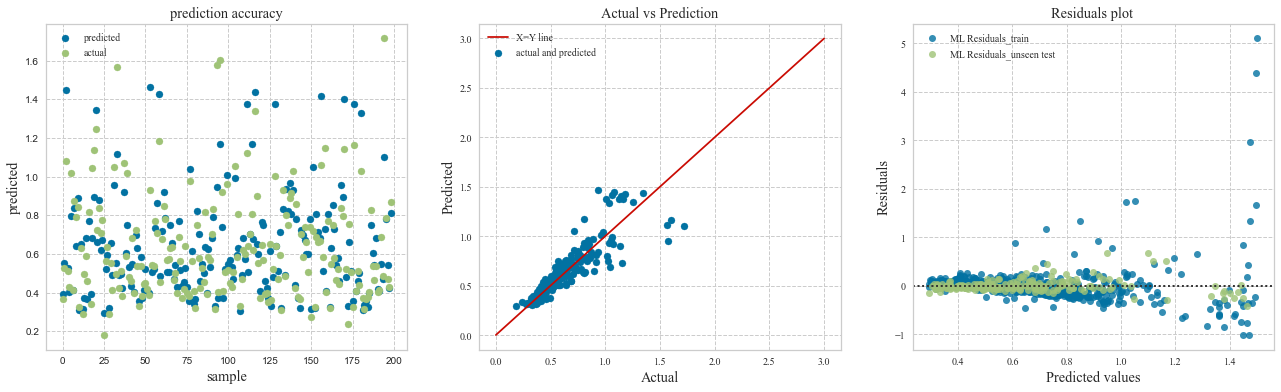

In [52]:
plt.figure(figsize=(22, 6))
csfont = {'fontname':'Times New Roman'}
plt.subplot(1,3,1)
plt.scatter(np.arange(0,len(ytestunk)),ytestunk,label='predicted')
plt.scatter(np.arange(0,len(y_Test)),y_Test,label='actual')
plt.grid( linestyle='--')
plt.title('prediction accuracy', fontsize='large',**csfont)
plt.xlabel('sample', fontsize='large',**csfont)
plt.ylabel('predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,2)
plt.scatter(y_Test,ytestunk,label='actual and predicted')
plt.plot([0,3],[0,3],color='r',label='X=Y line')
plt.grid( linestyle='--')
plt.title('Actual vs Prediction', fontsize='large',**csfont)
plt.xlabel('Actual', fontsize='large',**csfont)
plt.ylabel('Predicted', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.subplot(1,3,3)
a=sns.residplot(y=abs(y), x=abs(ytr),label='ML Residuals_train')
r=sns.residplot(y=abs(y_Test), x=abs(ytestunk),label='ML Residuals_unseen test')
plt.grid( linestyle='--')
plt.title('Residuals plot ', fontsize='large',**csfont)
plt.xlabel('Predicted values', fontsize='large',**csfont)
plt.ylabel('Residuals', fontsize='large',**csfont)
plt.rcParams["font.family"] = "Times New Roman"
plt.legend()

plt.show()

---
---

# Grid search

In [49]:
## Rib1
# n_estimators = [30,40,50,60]
max_features = ['auto','sqrt']
max_depth = [35,38,40,42,45,48,50]
min_samples_split = [0.05,0.06,0.065,0.07]
min_samples_leaf = [0.005,0.01,0.02]
criterion=['mse','mae']
warm_start=[True,False]
oob_score=[True,False]
bootstrap = [True,False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'criterion': criterion,
               'warm_start': warm_start,
               'oob_score': oob_score,
               'bootstrap': bootstrap}

In [50]:
Data=pd.read_csv('1000_y_data.csv')
features = Data.columns[1:23]
target = Data.columns[23:50]
Chest_deflection = Data.columns[23]
pelvis = Data.columns[24]
Rib1 = Data.columns[26]
col = Data.columns
cv = KFold(n_splits=10)
X=Data[features]
y=Data[Rib1]

In [51]:
y_t=np.log(y)
rf = RandomForestRegressor()
reg = GridSearchCV(rf,param_grid = random_grid ,cv = cv, return_train_score=True,scoring="neg_root_mean_squared_error", verbose=2, n_jobs = -1)
reg.fit(X,y_t)

Fitting 10 folds for each of 21504 candidates, totalling 215040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 236 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 469 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done 752 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 1666 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 2298 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3056 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 4106 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5644 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 7346 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 8672 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 10026 tasks      | elapsed:  7.2min
[Parallel(n_jobs=-1)]: Done 11402 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done 13242 tasks     

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['mse', 'mae'],
                         'max_depth': [35, 38, 40, 42, 45, 48, 50],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [0.005, 0.01, 0.02],
                         'min_samples_split': [0.05, 0.06, 0.065, 0.07],
                         'n_estimators': [5, 10, 15, 20, 30, 40, 50, 60],
                         'oob_score': [True, False],
                         'warm_start': [True, False]},
             return_train_score=True, scoring='neg_root_mean_squared_error',
             verbose=2)

In [54]:
reg.best_params_

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': 38,
 'max_features': 'auto',
 'min_samples_leaf': 0.005,
 'min_samples_split': 0.05,
 'n_estimators': 20,
 'oob_score': False,
 'warm_start': False}

In [53]:
reg.best_estimator_

RandomForestRegressor(max_depth=38, min_samples_leaf=0.005,
                      min_samples_split=0.05, n_estimators=20)

---
---

In [56]:
# Rib1:

mode=RandomForestRegressor(max_depth=38, min_samples_leaf=0.01, min_samples_split=0.05,criterion='mse',bootstrap=True,max_features='auto',warm_start=False,
                      n_estimators=20, oob_score=False)
mod = TransformedTargetRegressor(regressor=mode, func=np.log,inverse_func=np.exp)

## Learning Curve

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


<Figure size 576x396 with 0 Axes>

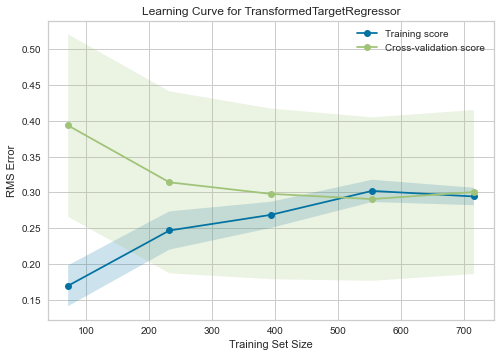

In [57]:
cv = KFold(n_splits=10, random_state=1)
y_actual = []
predict = []
X, X_Test, y, y_Test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size,train_score,test_score=learning_curve(mod,X,y,cv=cv,scoring='neg_root_mean_squared_error')

train_mean=-np.mean(train_score,axis=1)
train_std=-np.std(train_score,axis=1)
test_mean=-np.mean(test_score,axis=1)
test_std=-np.std(test_score,axis=1)
    
plt.figure()
plt.subplots(1)
plt.plot(train_size,train_mean, 'o-', color="b",label="Training score")
plt.plot(train_size, test_mean, 'o-', color="g",label="Cross-validation score")
plt.fill_between(train_size, train_mean - train_std, train_mean + train_std, alpha=0.2)
plt.fill_between(train_size, test_mean - test_std, test_mean + test_std, alpha=0.2)
plt.title("Learning Curve for {}".format(str(mod).split('(')[0]))
plt.xlabel("Training Set Size")
plt.ylabel("RMS Error")
plt.legend(loc="best")
plt.show()

## Unknown data test

In [58]:
X = X.to_numpy()
y = y.to_numpy()
y_Test=y_Test.to_numpy()
kf=cv

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    HBM_Train = mod.fit(X_train, y_train)
    HBM_Test = HBM_Train.predict(X_test)
    print('Root Mean squared error: %f'
          % mean_squared_error(y_test, HBM_Test,squared=False))
    print()

ytestunk=HBM_Train.predict(X_Test)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y_Test[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

Root Mean squared error: 0.182656

Root Mean squared error: 0.221004

Root Mean squared error: 0.454432

Root Mean squared error: 0.273610

Root Mean squared error: 0.389078

Root Mean squared error: 0.209992

Root Mean squared error: 0.528180

Root Mean squared error: 0.217319

Root Mean squared error: 0.188642

Root Mean squared error: 0.310796

error COV--->0    1.898356
dtype: float64  error mean --->0    0.194768
Name: mean, dtype: float64  error std --->0    0.36974
Name: std, dtype: float64


# train score

In [59]:
ytestunk=HBM_Train.predict(X)
err=np.zeros(len(ytestunk))
for u in range (0,len(ytestunk)):
    err[u]=np.sqrt((y[u]-ytestunk[u])**2)
a=pd.DataFrame(err).describe()
cov_r=a.loc['std']/abs(a.loc['mean'])
print("error COV--->{}  error mean --->{}  error std --->{}".format(cov_r,abs(a.loc['mean']),a.loc['std']))

error COV--->0    1.957091
dtype: float64  error mean --->0    0.137361
Name: mean, dtype: float64  error std --->0    0.268828
Name: std, dtype: float64


In [184]:
# define model evaluation method
cv = KFold(n_splits=10,random_state=1)
# evaluate model
scores = cross_val_score(mod, X, y, scoring='neg_root_mean_squared_error', cv=cv, n_jobs=-1)

scores = abs(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()))

C:\Users\Akhil Srinivas\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


Mean MAE: 0.153 (0.055)
